In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
# 가장 높은 정확도를 보여주는 코드 작성
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# 데이터 로드 및 전처리
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.3, random_state=42)

In [6]:
# KNN 모델 훈련 및 평가
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Accuracy:", knn.score(X_test, y_test))

Accuracy: 0.9707602339181286


In [7]:
# 하이퍼파라미터 튜닝
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)

Best params: {'n_neighbors': 5}


In [8]:
# 최적의 모델 평가
best_knn = grid_search.best_estimator_
print("Best accuracy:", best_knn.score(X_test, y_test))

Best accuracy: 0.9707602339181286


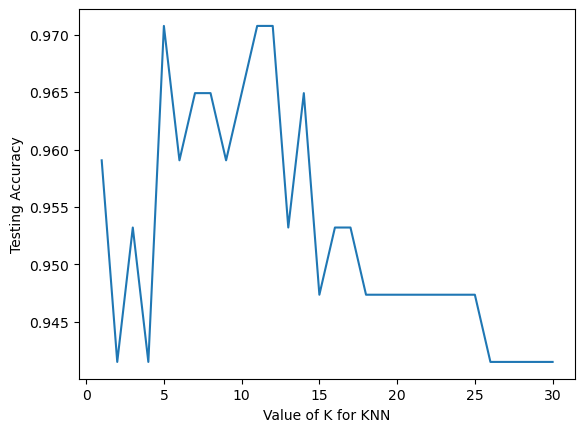

In [9]:
# K 값에 따른 정확도 시각화
k_range = range(1, 31)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_scores.append(knn.score(X_test, y_test))

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()